# NLP-Powered Sentiment Analysis: Unveiling Customer Insights from Expedia Reviews


# NLP Sentiment Analysis  Project

## Introduction
This project aims to perform sentiment analysis on a Hotel Reviews dataset by utilizing natural language processing (NLP) techniques. As part of this analysis, we will preprocess the data, do the sentiment analisys, and translate the results into actionable insights.

## Project Overview
In this notebook, we will cover the following steps:
1. Data Loading and Exploration
2. Data Preprocessing
3. Sentiment Analisys
4. Data Visualization

Team Members

Alexander Meneses – C0900272​

Christian Jimenez – C0891438​

Magda Diaz – C0900484​

Maira Ospino – C0895237​

Johana Saenz – C0903415​

Paing Hein – C0907275

In [1]:
# Step 1: Install libraries
!pip install pandas matplotlib seaborn nltk textblob googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=164e803f48b1ddc8c75dc2a48eddd923fca50a1b181e99e0187ec0ba7c2ae0ca
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [2]:
# Step 2: Import necessary libraries

import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
from nltk.corpus import stopwords  # For common words removal in text processing
from nltk.tokenize import word_tokenize  # For splitting text into individual words
from textblob import TextBlob  # For text processing tasks like sentiment analysis and translation
from googletrans import Translator  # For text translation using Google Translate API
import nltk  # Main NLTK module for downloading additional text processing resources
import re  # For regular expressions in text searching and manipulation

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Step 3: Download necessary NLTK resources

nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stopword lists

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load and Preview Data

In [4]:
# Step 4: Load Expedia data from the uploaded file
file_path = '/content/translated_hotels_review.csv'
df = pd.read_csv(file_path)

# Step 5: Display the first few rows of the DataFrame
df.head()

Unnamed: 0  Rating        Date  \
0           0      10  18-09-2023   
1           1      10  05-09-2023   
2           2       8  31-10-2022   
3           3      10  03-09-2022   
4           4      10  07-12-2021   

                                              Review            Hotel_name  \
0  Très bon hôtel comme attendu. On s’occupe de v...  barriere-le-majestic   
1  Magnifique hôtel \nTrès belles prestations \nP...  barriere-le-majestic   
2  personnel à l'écoute et agréable, mais les cha...  barriere-le-majestic   
3  Accueil chaleureux, bon service et bonne nourr...  barriere-le-majestic   
4  Excellent Hotel bien situé, excellent service ...  barriere-le-majestic   

     City Country Language  
0  Cannes  France       fr  
1  Cannes  France       fr  
2  Cannes  France       fr  
3  Cannes  France       fr  
4  Cannes  France       fr

# Data Cleaning

In [5]:
# Step 6: Identify and dro or fill null values

print("Null values in each column:")
print(df.isnull().sum())

# Drop rows where 'Review' or 'Rating' is null
df_cleaned = df.dropna(subset=['Review', 'Rating'])

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing 'Date' with a placeholder date
df_cleaned['Date'].fillna('2023-01-01', inplace=True)

# Fill missing 'City' In 'Blank'
df_cleaned['City'].fillna(' ', inplace=True)

# Fill missing 'City' In 'Blank'
df_cleaned['Hotel_name'].fillna(' ', inplace=True)

# Fill missing 'City' In 'Blank'
df_cleaned['City'].fillna(' ', inplace=True)

# Fill missing 'Language' with 'Unknown'
df_cleaned['Language'].fillna('Unknown', inplace=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)

Null values in each column:
Unnamed: 0    0
Rating        0
Date          0
Review        0
Hotel_name    0
City          0
Country       0
Language      0
dtype: int64

Cleaned DataFrame:
      Unnamed: 0  Rating        Date  \
0              0      10  18-09-2023   
1              1      10  05-09-2023   
2              2       8  31-10-2022   
3              3      10  03-09-2022   
4              4      10  07-12-2021   
...          ...     ...         ...   
3804        3805       6  04-08-2021   
3805        3806       8  02-08-2021   
3806        3807       8  02-08-2021   
3807        3808      10  02-08-2021   
3808        3809      10  02-08-2021   

                                                 Review  \
0     Très bon hôtel comme attendu. On s’occupe de v...   
1     Magnifique hôtel \nTrès belles prestations \nP...   
2     personnel à l'écoute et agréable, mais les cha...   
3     Accueil chaleureux, bon service et bonne nourr...   
4     Excellent Hotel bien situé, e

<ipython-input-5-9d7703b6831a>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [6]:
# Step 7: Text Cleaning Function

def clean_text(text):

  # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
df['cleaned_review'] = df['Review'].apply(clean_text)

df = df.drop_duplicates(subset=['Review', 'Hotel_name', 'Date'])

df.head()


Unnamed: 0  Rating       Date  \
0           0      10 2023-09-18   
1           1      10 2023-09-05   
2           2       8 2022-10-31   
3           3      10 2022-09-03   
4           4      10 2021-12-07   

                                              Review            Hotel_name  \
0  Très bon hôtel comme attendu. On s’occupe de v...  barriere-le-majestic   
1  Magnifique hôtel \nTrès belles prestations \nP...  barriere-le-majestic   
2  personnel à l'écoute et agréable, mais les cha...  barriere-le-majestic   
3  Accueil chaleureux, bon service et bonne nourr...  barriere-le-majestic   
4  Excellent Hotel bien situé, excellent service ...  barriere-le-majestic   

     City Country Language                                     cleaned_review  
0  Cannes  France       fr  trs bon htel comme attendu on soccupe de vous ...  
1  Cannes  France       fr  magnifique htel trs belles prestations petit d...  
2  Cannes  France       fr  personnel lcoute et agrable mais les chambres ...  
3  Cannes  France       fr  accueil chaleureux bon service et bonne nourri...  
4  Cannes  France       fr  excellent hotel bien situ excellent service do...

In [7]:
# Step 8: Display the columns of the DataFrame to find the correct review column name
df.columns

Index(['Unnamed: 0', 'Rating', 'Date', 'Review', 'Hotel_name', 'City',
       'Country', 'Language', 'cleaned_review'],
      dtype='object')

# Data Preprocesing

In [8]:
# Step 9: Initialize the translator
translator = Translator()

In [9]:
# Step 10: Function to translate text to English
def translate_to_english(text):
    try:
        translated = translator.translate(text, dest='en')
        return translated.text
    except Exception as e:
        return text  # Return the original text if translation fails

In [10]:
# Step 11: Translate reviews to English
review_column_name = 'Review'  # Change this to the actual column name if different
df['review_english'] = df[review_column_name].apply(translate_to_english)

In [11]:
# Step 12: Text preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove non-alphanumeric tokens and stopwords
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [12]:
# Step 12: Apply preprocessing to the translated review text
df['processed_review'] = df['review_english'].apply(preprocess_text)

# Sentiment Analysis

In [13]:
# Step 13: Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    # Return the polarity of the text
    return blob.sentiment.polarity

In [14]:
# Step 14: Apply sentiment analysis to the processed reviews
df['sentiment'] = df['processed_review'].apply(get_sentiment)

In [15]:
# Step 15: Determine if sentiment is positive, negative, or neutral
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

# Exploratory Data Analisys

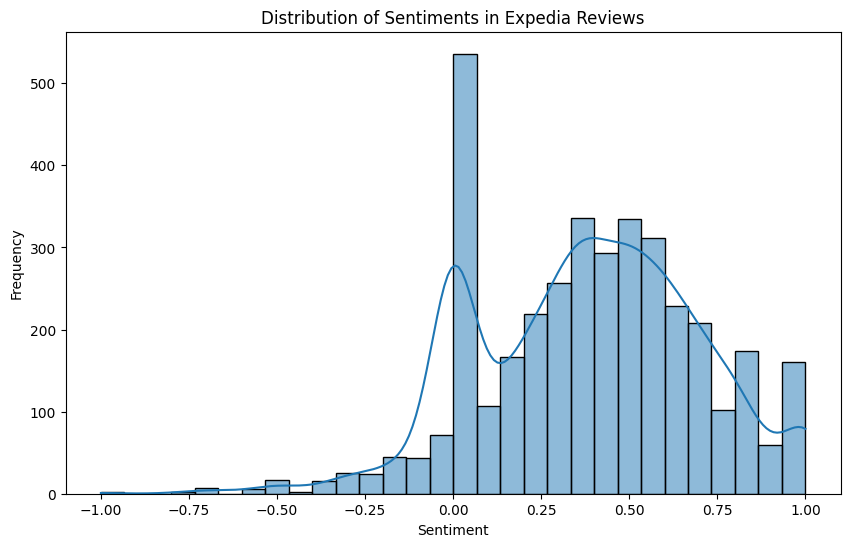

In [16]:
# Step 16: Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiments in Expedia Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

sentiment_label
positive    3045
neutral      448
negative     262
Name: count, dtype: int64


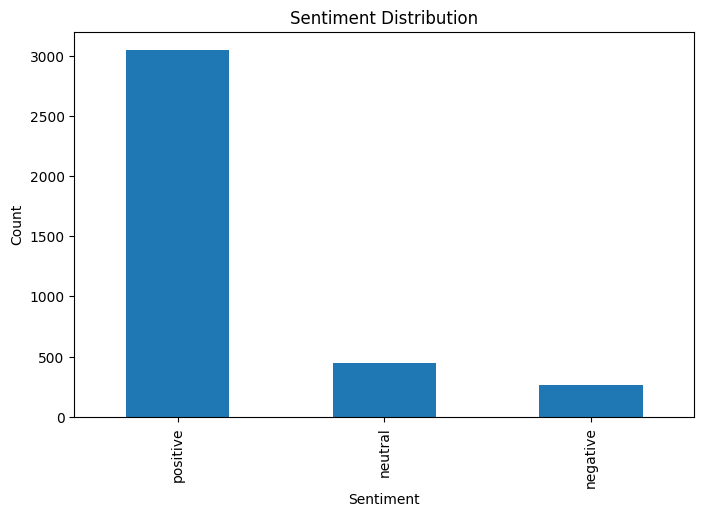

In [17]:
# Step 17: Display sentiment statistics
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)
sentiment_counts.plot(kind='bar', figsize=(8, 5), title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [18]:
# Step 18: Display some reviews with their sentiments
df[[review_column_name, 'processed_review', 'sentiment', 'sentiment_label']].head(10)

Review  \
0  Très bon hôtel comme attendu. On s’occupe de v...   
1  Magnifique hôtel \nTrès belles prestations \nP...   
2  personnel à l'écoute et agréable, mais les cha...   
3  Accueil chaleureux, bon service et bonne nourr...   
4  Excellent Hotel bien situé, excellent service ...   
5  Un sejour plus que parfait dans un hôtel d'exc...   
6  Parfait, une fois sur place, nous avons été su...   
7  Un automne incroyable on appelle ça un palace ...   
8  Beautiful hotel, kind and lovely staff , amazi...   
9                         Personnel très accueillant   

                                    processed_review  sentiment  \
0             good hotel take care without recommend   0.700000   
1  beautiful hotel good performances extraordinar...   0.627778   
2  listening pleasant staff rooms small swimming ...   0.241667   
3                warm welcome good service good food   0.700000   
4  excellent hotel well located excellent service...   0.433333   
5  perfect stay exceptional hotel welcome perfect...   0.655892   
6                                 perfect outclassed   1.000000   
7  incredible fall called palace tailor service r...   0.625000   
8  beautiful hotel kind lovely staff amazing brea...   0.637500   
9                                    welcoming staff   0.000000   

  sentiment_label  
0        positive  
1        positive  
2        positive  
3        positive  
4        positive  
5        positive  
6        positive  
7        positive  
8        positive  
9         neutral

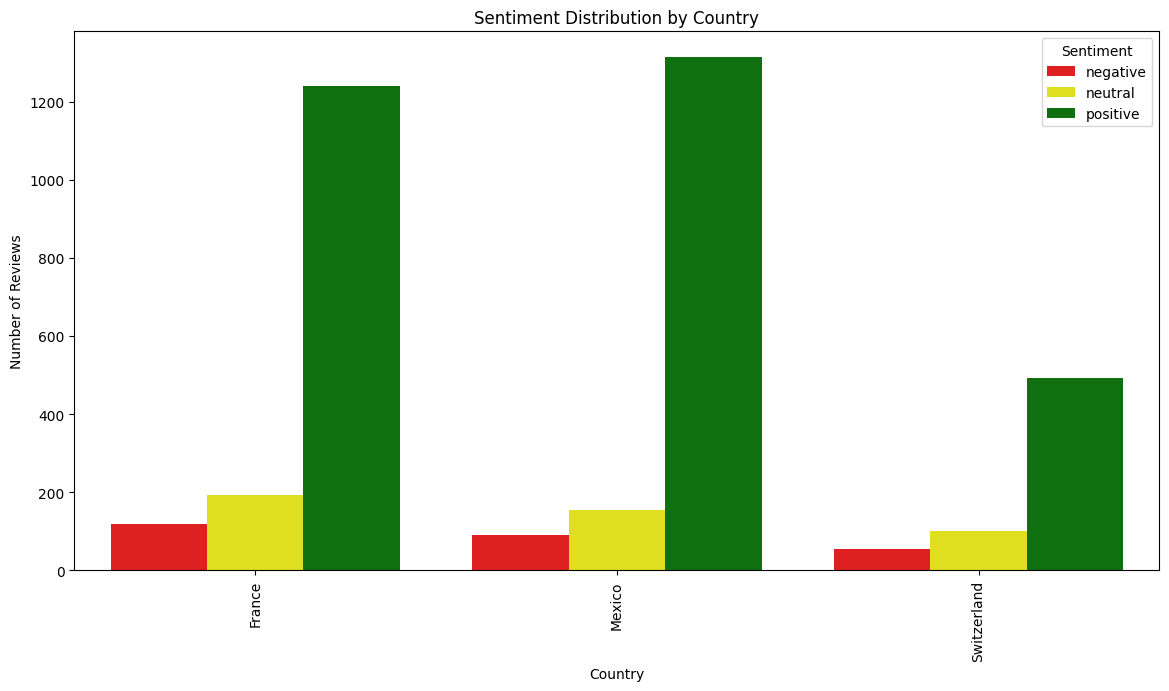

sentiment_label      Country  negative  neutral  positive
0                     France       118      193      1239
1                     Mexico        90      155      1314
2                Switzerland        54      100       492

In [19]:
# Step 19: Sentiment analysis function
df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

# Group by country and sentiment label, then count the occurrences
country_sentiment = df.groupby(['Country', 'sentiment_label']).size().unstack(fill_value=0)

# Reset index for better plotting with seaborn
country_sentiment = country_sentiment.reset_index()

# Melt the DataFrame for seaborn plotting
country_sentiment_melted = country_sentiment.melt(id_vars='Country', var_name='sentiment', value_name='count')

# Visualize the sentiment distribution by country using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=country_sentiment_melted, x='Country', y='count', hue='sentiment', palette={'positive': 'green', 'neutral': 'yellow', 'negative': 'red'})
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.show()

# Display sentiment statistics by country
country_sentiment

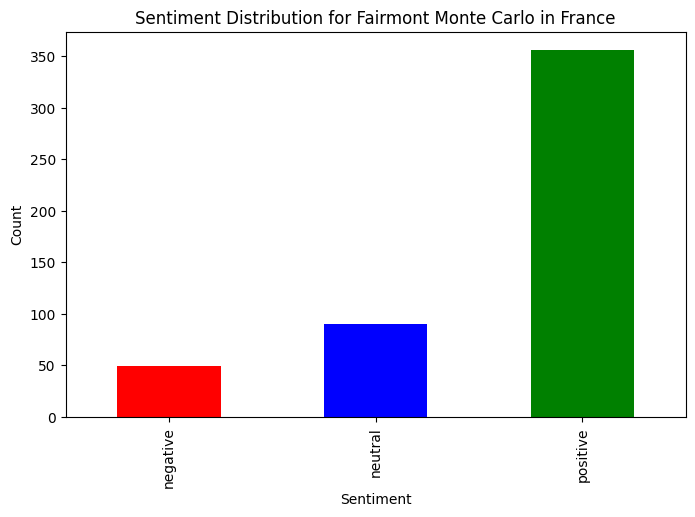

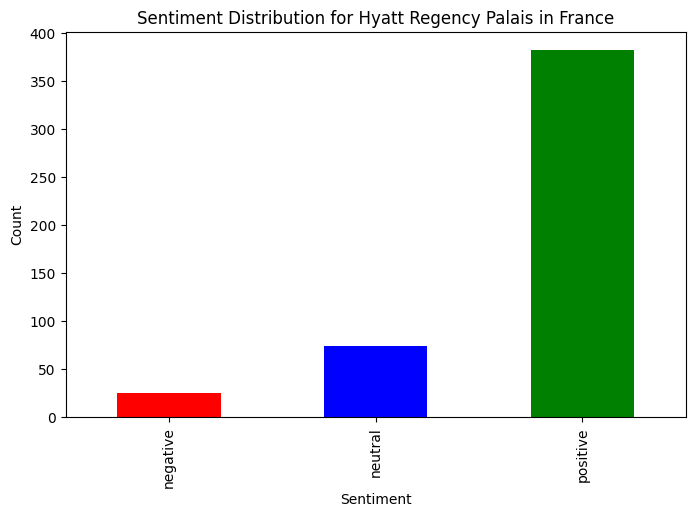

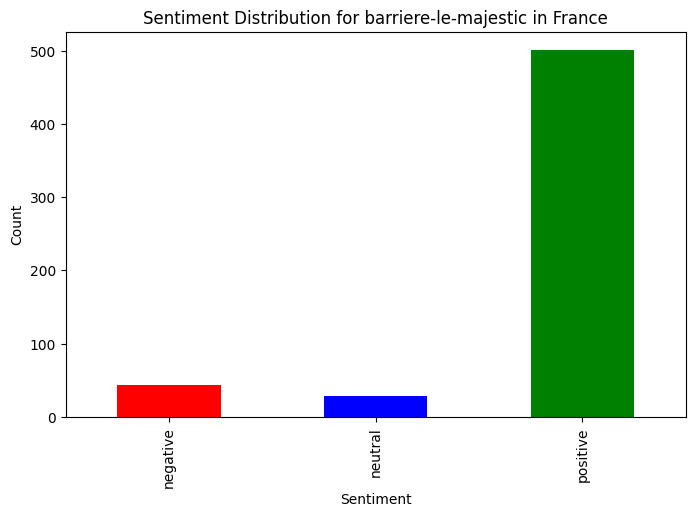

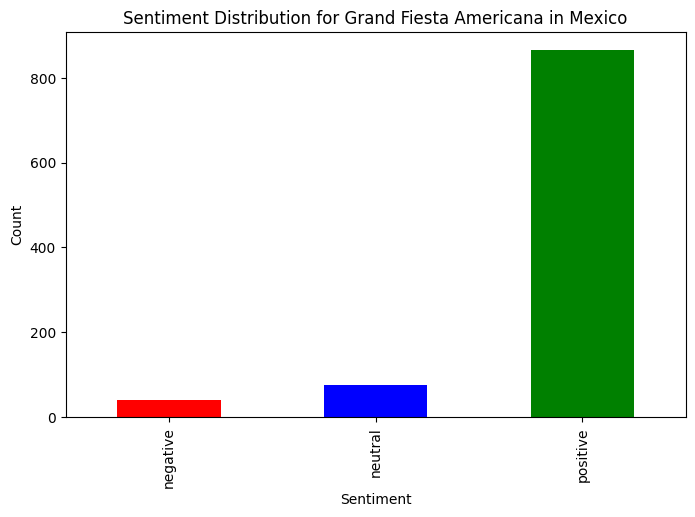

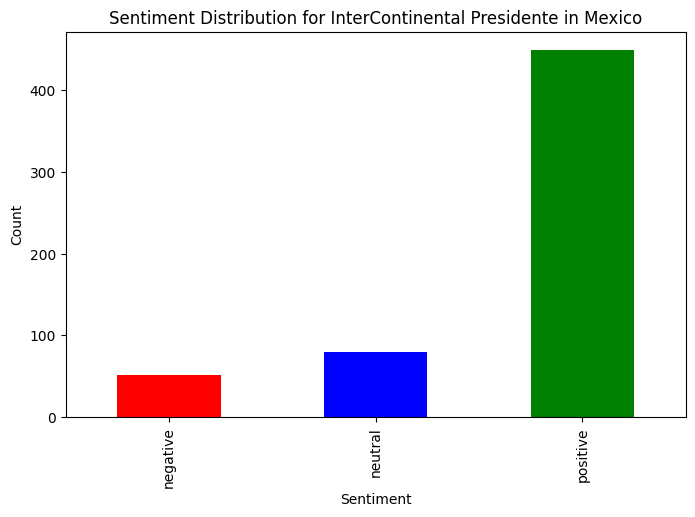

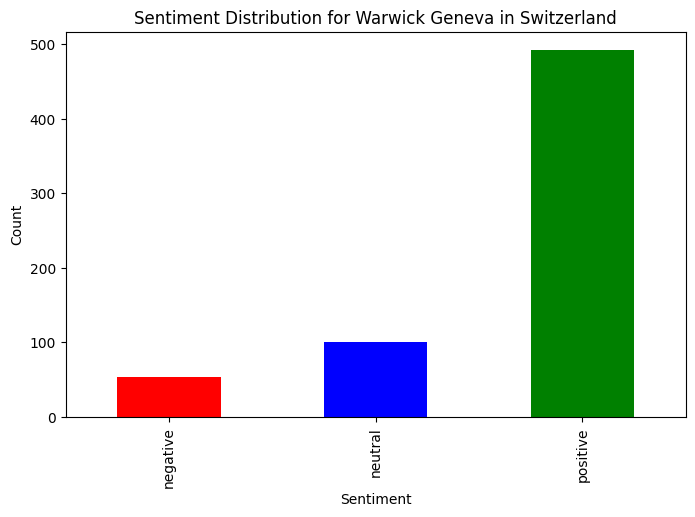

In [20]:
grouped = df.groupby(['Country', 'Hotel_name', 'sentiment_label']).size().unstack(fill_value=0)

# Custom colors for sentiment labels
colors = {
    'positive': 'green',
    'negative': 'red',
    'neutral': 'blue'
}



# Plot sentiment distribution for each Country and Hotel_name
for (country, hotel_name), sentiment_counts in grouped.iterrows():
    sentiment_counts.plot(kind='bar', figsize=(8, 5), title=f'Sentiment Distribution for {hotel_name} in {country}', color=[colors[label] for label in sentiment_counts.index])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


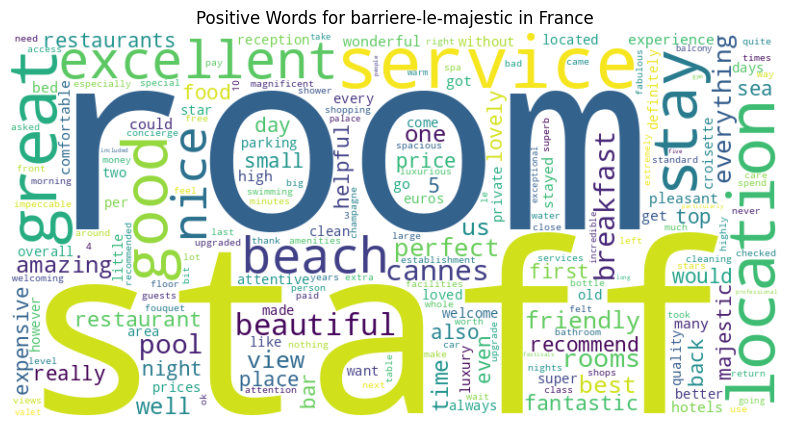

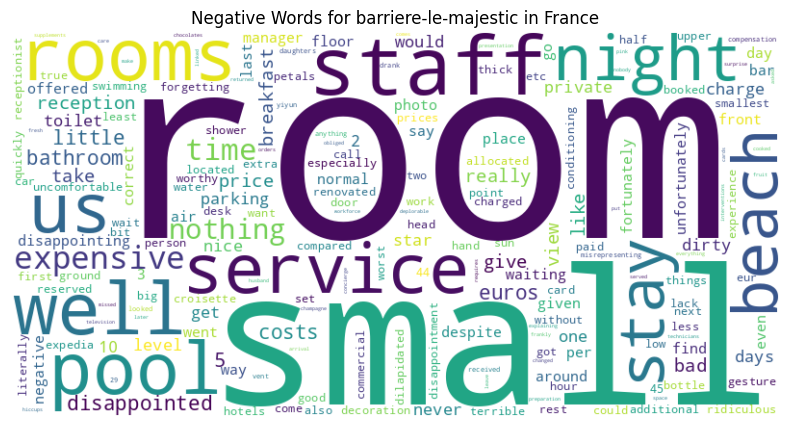

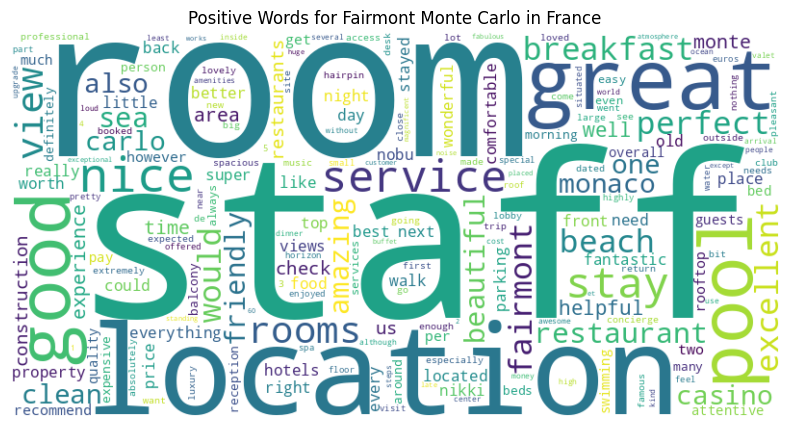

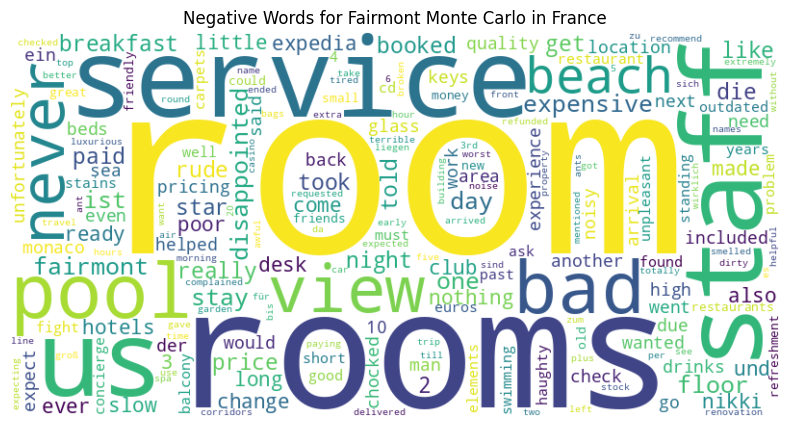

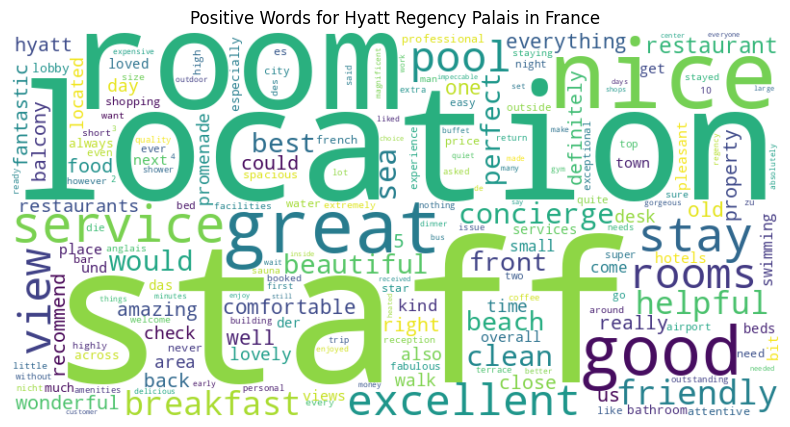

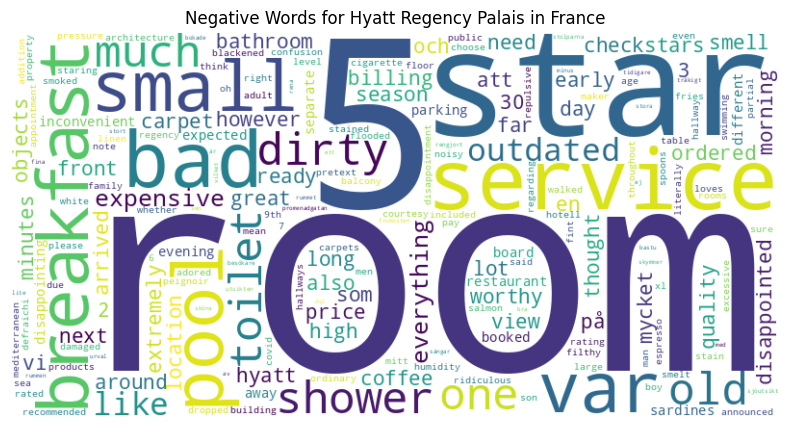

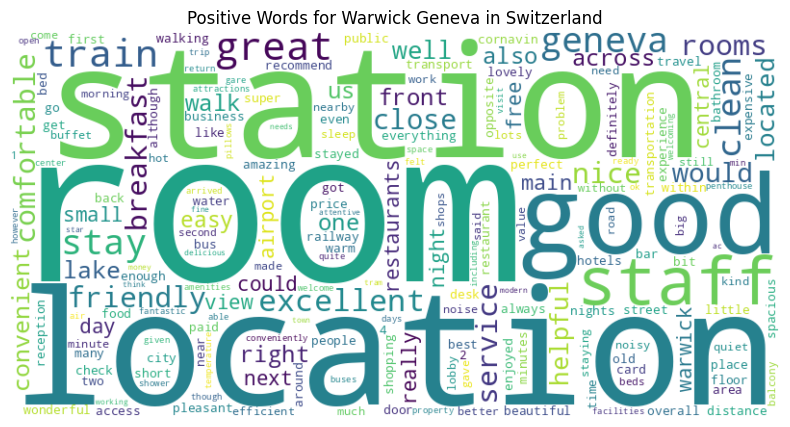

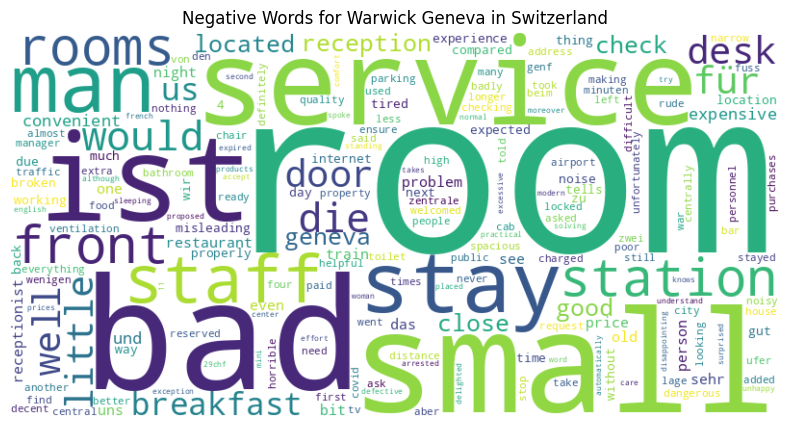

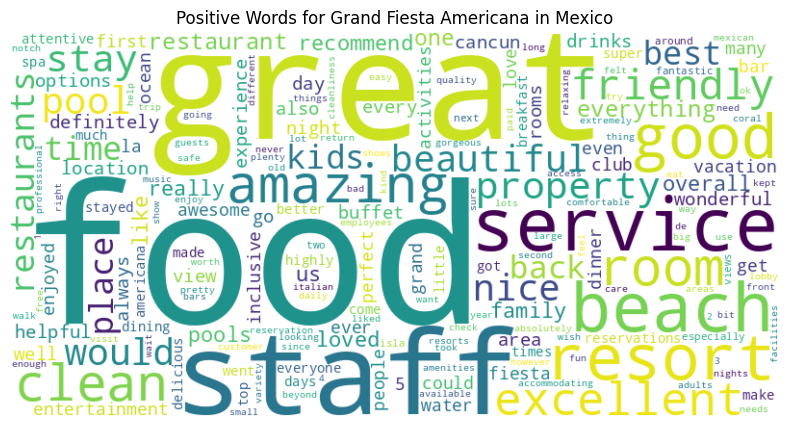

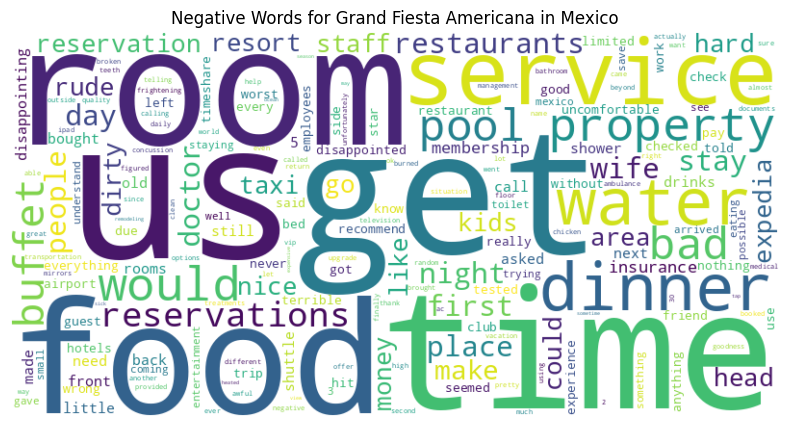

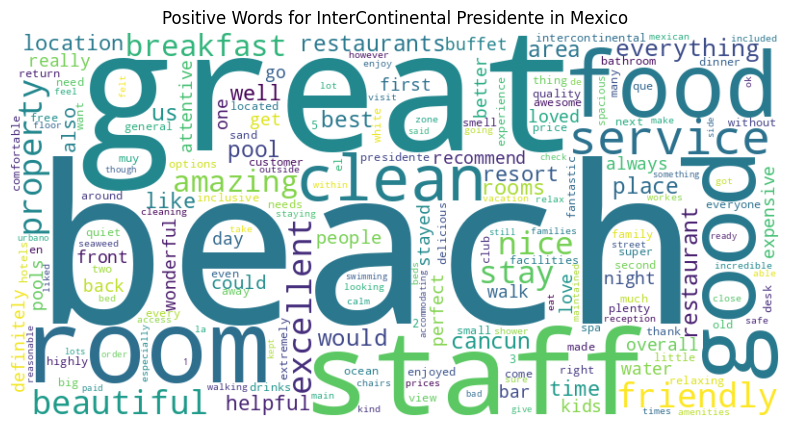

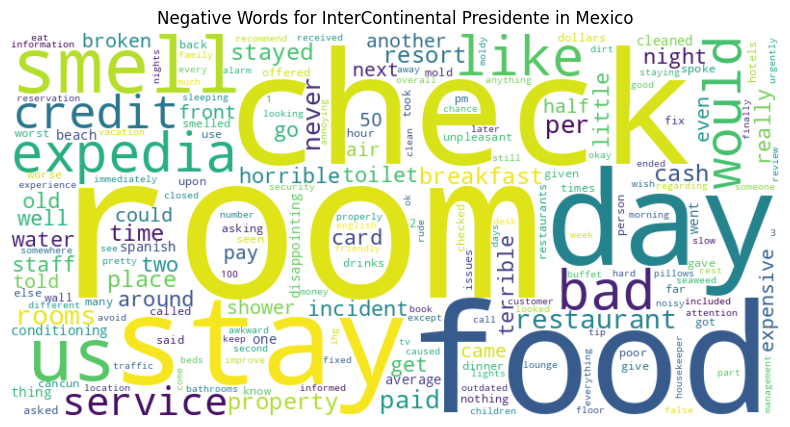

In [22]:
!pip install wordcloud nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return text.split()


# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('hotel')

# Simple tokenization function excluding stopwords
def tokenize(text):
    words = text.split()
    return [word for word in words if word.lower() not in stop_words]

# Function to generate word clouds for each hotel and country
def generate_wordclouds(df, hotel_column='Hotel_name', country_column='Country', review_column='processed_review', sentiment_column='sentiment_label'):
    hotels = df[hotel_column].unique()

    for hotel in hotels:
        hotel_reviews = df[df[hotel_column] == hotel]
        country = hotel_reviews[country_column].values[0]  # Assuming each hotel is in one country

        positive_reviews = hotel_reviews[hotel_reviews[sentiment_column] == 'positive'][review_column].tolist()
        negative_reviews = hotel_reviews[hotel_reviews[sentiment_column] == 'negative'][review_column].tolist()

        positive_words = Counter()
        negative_words = Counter()

        for review in positive_reviews:
            positive_words.update(tokenize(review))

        for review in negative_reviews:
            negative_words.update(tokenize(review))

        # Generate and display the positive word cloud
        positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(positive_wordcloud, interpolation='bilinear')
        plt.title(f'Positive Words for {hotel} in {country}')
        plt.axis('off')
        plt.show()

        # Generate and display the negative word cloud
        negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(negative_wordcloud, interpolation='bilinear')
        plt.title(f'Negative Words for {hotel} in {country}')
        plt.axis('off')
        plt.show()

# Generate the word clouds
generate_wordclouds(df)


In [36]:
import pandas as pd
import nltk
from collections import Counter
import plotly.graph_objects as go

nltk.download('averaged_perceptron_tagger')

# Function to extract adjectives around the word "room"
def extract_adjectives(text, keyword='room', window=5):
    words = nltk.word_tokenize(text)
    keyword_indices = [i for i, word in enumerate(words) if keyword in word.lower()]
    adjectives = []

    for index in keyword_indices:
        start = max(index - window, 0)
        end = min(index + window + 1, len(words))
        context = words[start:end]
        tagged_context = nltk.pos_tag(context)
        adjectives += [word for word, pos in tagged_context if pos in ['JJ', 'JJR', 'JJS']]  # Adjectives

    return adjectives

# Apply the function to the reviews
df['room_adjectives'] = df['review_english'].apply(lambda x: extract_adjectives(x))

# Dummy sentiment analysis (replace with your sentiment analysis logic)
import random
df['Sentiment'] = df['review_english'].apply(lambda x: random.choice(['Positive', 'Negative', 'Neutral']))

# Group by hotel and sentiment and find the most common adjectives for each group
hotel_sentiment_adjectives = df.groupby(['Hotel_name', 'Sentiment'])['room_adjectives'].apply(lambda x: Counter([adj for sublist in x for adj in sublist]).most_common(1))

# Prepare the data for tabulation without the count
visual_data = []
for (hotel, sentiment), adj_list in hotel_sentiment_adjectives.items():
    if adj_list:
        adjective = adj_list[0][0]
    else:
        adjective = 'None'
    visual_data.append([hotel, sentiment, adjective])

visual_df = pd.DataFrame(visual_data, columns=['Hotel_name', 'Sentiment', 'Adjective'])

# Pivot the table to avoid repeating hotel names
pivot_df = visual_df.pivot(index='Hotel_name', columns='Sentiment', values='Adjective').reset_index()

# Create the table with Plotly
fig = go.Figure(data=[go.Table(
    columnwidth=[200, 200, 200, 200],
    header=dict(values=['Hotel Name', 'Negative Sentiment', 'Neutral Sentiment', 'Positive Sentiment'],
                fill_color='royalblue',
                align='center',
                font=dict(color='white', size=16)),
    cells=dict(values=[pivot_df['Hotel_name'], pivot_df.get('Negative', 'None'), pivot_df.get('Neutral', 'None'), pivot_df.get('Positive', 'None')],
               fill=dict(color=['paleturquoise', 'lavender', 'lavender', 'lavender']),
               align='center',
               font=dict(color='black', size=14)))
])

fig.update_layout(
    title='Most Common Adjectives for "room" by Hotel and Sentiment',
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=0, r=0, t=50, b=0),
    width=800,
    height=600
)

fig.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
